# Importe

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

plt.style.use('classic')
plt.rc('text',usetex=True)
#plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen

# Selbstdefinierte Funktionen

In [2]:
# lineare Regression
def reg(x,a,b):
    regg = a * x + b
    return regg

# U_ss in U_s umrechnen
def us(x):
    f = x/(2)
    return f

def Z_1(U1,U2,R):            # Gleichung (21), Versuchsskript
    k = R * (U1-U2)/U2
    return k

def Z_2(x,a,b):
    k = np.sqrt((x*a)**2 + b**2)
    return k

def reg2(x,a,b):   # siehe Louis Protokoll.
    f = 1/(a*x+b)
    return f

# Daten laden

In [3]:
# help(pd.DataFrame)

In [4]:
A1_df = pd.read_csv('A1.txt',sep='\t')
A3_df = pd.read_csv('A3_Eigene_Werte.txt',sep='\t')
A5_df = pd.read_csv('A5_Eigene_Werte.txt',sep='\t')
A2_df = pd.read_csv('A2.txt',sep='\t')
A9_df = pd.read_csv('A9.txt',sep='\t')
A10_df = pd.read_csv('A10.txt',sep='\t')
A12_df = pd.read_csv('A12.txt',sep='\t')

In [5]:
print('Daten A1')
A1_df.head()


Daten A1


,Signal,Frequenz(Hz),U_ss,U_eff
0,sinus,1422.0,22.0,NaN
1,sinus,538.5,23.0,NaN
2,Dreieck,16596.0,23.0,NaN
3,Rechteck,16597.0,23.0,NaN
4,sinus,1430.0,NaN,7.42


In [6]:
print('\n Daten A2')
A2_df.head()



 Daten A2


,Kapazität,Widerstand u_k,u_w
98.5,149.9,2.955,11.99


In [7]:
print('\n Daten A3')
A3_df.head()



 Daten A3


,Nr,Frequenz,U_ss_K1,U_ss_K2
0,1,1053,14,14.00
1,2,1884,14,13.80
2,3,3010,14,14.00
3,4,3974,14,14.25
4,5,5152,14,14.05


In [8]:
print('\n Daten A5')
A5_df.head()



 Daten A5


,Nr,Frequenz,U_2,U_1,T_1/2(ms),t_D(ms)
0,1,31.55,22.50,21.50,15.0,15.0
1,2,41.73,22.50,23.00,12.0,12.0
2,3,52.50,22.50,22.75,9.0,9.0
3,4,60.60,22.25,22.50,8.0,8.0
4,5,70.20,22.50,23.00,7.2,7.2


In [9]:
print('\n Daten A9')
A9_df.head()



 Daten A9


,Nr Resonanzfreqzenz
1,729.7
2,776.5
3,678.0
4,702.9
5,632.4


In [10]:
print('\n Daten A10')
A10_df.head()



 Daten A10


,Name,Messwert
0,U_G,6.705
1,U_S,55.300
2,U_Pw,0.241
3,U_K,54.800
4,U_SK,6.475


In [11]:
print('\n Daten A12')
A12_df.head()


 Daten A12


,Nr,Frequenz,U_2(mV),U_1(V),t_D(ms)
0,1,211.80,36,22.5,1.200
1,2,303.50,52,23.0,0.800
2,3,398.25,84,22.5,0.550
3,4,508.50,150,22.5,0.475
4,5,608.50,315,22.0,0.300


# Aufgabe 1

In [12]:
A1_df

,Signal,Frequenz(Hz),U_ss,U_eff
0,sinus,1422.0,22.0,NaN
1,sinus,538.5,23.0,NaN
2,Dreieck,16596.0,23.0,NaN
3,Rechteck,16597.0,23.0,NaN
4,sinus,1430.0,NaN,7.420
5,sinus,540.0,NaN,7.940
6,Dreieck,1660.0,NaN,6.465
7,Rechteck,1660.0,NaN,11.769


In [ ]:
Signal= A1_df['Signal']
A1_Osz1 = pd.Series(A1_df['Frequenz(Hz)'][0:4])
#print(A1_Osz1)
A1_Osz2 = pd.Series(A1_df['U_ss'][0:4])
#print(A1_Osz2)
print(Signal[0:4])
A1_Osz = pd.DataFrame({'Freq': list(A1_Osz1),
                       'U_ss':list(A1_Osz2)},
                      index=['sinus','sinus','Dreieck','Rechteck'])#
print('\n','Oszillator','\n',A1_Osz)

A1_Mul = pd.DataFrame({'Freq': list(A1_df['Frequenz(Hz)'][4:8]),
                     'U_eff':list(A1_df['U_eff'][4:8])},
                    index=['sinus','sinus','Dreieck','Rechteck'])
print('\n','Multimeter\n',A1_Mul)

0       sinus
1       sinus
2     Dreieck
3    Rechteck
Name: Signal, dtype: object

 Oszillator 
              Freq  U_ss
sinus      1422.0  22.0
sinus       538.5  23.0
Dreieck   16596.0  23.0
Rechteck  16597.0  23.0

 Multimeter
             Freq   U_eff
sinus     1430.0   7.420
sinus      540.0   7.940
Dreieck   1660.0   6.465
Rechteck  1660.0  11.769


In [14]:
U_s = us(A1_Osz['U_ss'])
faktor= [1/np.sqrt(2),1/np.sqrt(2),1/np.sqrt(3),1]
U_eff = U_s * faktor
print(U_eff)
print('\n')
print(A1_Mul['U_eff'])
print('\n')
diff = A1_Mul['U_eff']-U_eff
print(diff)

sinus        7.778175
sinus        8.131728
Dreieck      6.639528
Rechteck    11.500000
Name: U_ss, dtype: float64


sinus        7.420
sinus        7.940
Dreieck      6.465
Rechteck    11.769
Name: U_eff, dtype: float64


sinus      -0.358175
sinus      -0.191728
Dreieck    -0.174528
Rechteck    0.269000
dtype: float64


# Aufgabe 2

In [ ]:
# Kapazität Aufgabe 2
C_A_2 = 98.5e-9
err_c = 98.5e-9 * 0.3
print(f"Kapazität: {C_A_2}+-{err_c}")

# Ohmscher Widerstand Spule
R_L = 149.90
err_R_L = 149.90 * 0.8 /100
print(f"Ohmscher Widerstand Spule: {R_L}+-{round(err_R_L,1)}")

Kapazität: 9.85e-08+-2.955e-08
Ohmscher Widerstand Spule: 149.9+-1.2


In [16]:
print(round(98.5e-9,7))
print(round(err_c,7))

1e-07
0.0


# Aufgabe 3

In [17]:
A3_df

,Nr,Frequenz,U_ss_K1,U_ss_K2
0,1,1053,14,14.00
1,2,1884,14,13.80
2,3,3010,14,14.00
3,4,3974,14,14.25
4,5,5152,14,14.05
5,6,5855,14,14.00


In [18]:
U_2 = np.array(A3_df['U_ss_K1'])
U_1 = np.array(A3_df['U_ss_K2'])
f = np.array(A3_df['Frequenz'])
R_p = 10e3*np.ones(6)

In [19]:
print(len(U_2))
print(len(U_1))
print(len(R_p))

6
6
6


In [20]:
Z = Z_1(U_1,U_2,R_p)
Z

array([   0.        , -142.85714286,    0.        ,  178.57142857,
         35.71428571,    0.        ])

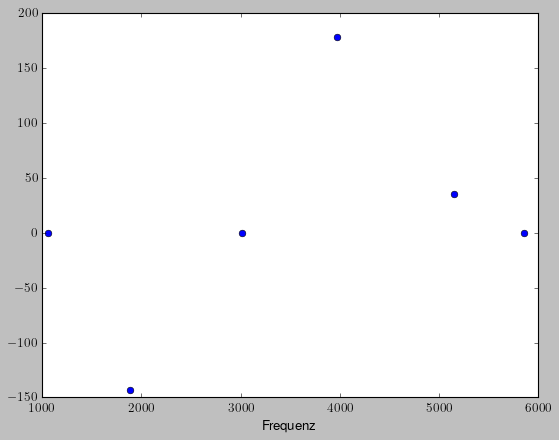

In [21]:
plt.plot(f,Z,'o')
plt.xlabel(r'Frequenz')
plt.show()

In [ ]:
xa3 = np.ones(6)
for i in range(6):
    xa3[i] = float(f[i])


ya3 = Z
print(f)
print(ya3)

[1053 1884 3010 3974 5152 5855]
[   0.         -142.85714286    0.          178.57142857   35.71428571
    0.        ]


## Regression

In [23]:
pop,cov = curve_fit(Z_2,xa3,ya3)
a3,b3 = pop
# da3,db3 = np.diagonal(np.sqrt(cov))

In [24]:
print(a3)
print(b3)

0.006914633987691402
-0.0002465503970657967


In [25]:
pop, cov = curve_fit(reg2,xa3,ya3)
a3_2,b3_2= pop

In [26]:
x_plot = np.arange(0,6000,100)
print(x_plot)
y_plot = Z_2(x_plot,a3,b3)
y_plot_2 = reg2(x_plot,a3_2,b3_2)
print(y_plot_2)

[   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300
 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700
 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100
 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500
 5600 5700 5800 5900]
[-1.56407873e-03  1.05701713e-04  5.11233769e-05  3.37149167e-05
  2.51506522e-05  2.00560209e-05  1.66777080e-05  1.42734358e-05
  1.24750258e-05  1.10790933e-05  9.96412596e-06  9.05305329e-06
  8.29463133e-06  7.65346062e-06  7.10430177e-06  6.62867442e-06
  6.21273664e-06  5.84591562e-06  5.51999633e-06  5.22849902e-06
  4.96624399e-06  4.72904115e-06  4.51346444e-06  4.31668526e-06
  4.13634771e-06  3.97047379e-06  3.81739055e-06  3.67567345e-06
  3.54410194e-06  3.42162418e-06  3.30732886e-06  3.20042253e-06
  3.10021109e-06  3.00608474e-06  2.91750556e-06  2.83399722e-06
  2.75513641e-06  2.68054564e-06  2.60988726e-06  2.54285828e-06
  2.47918606e-06  2.41862460e-06  2.36095137

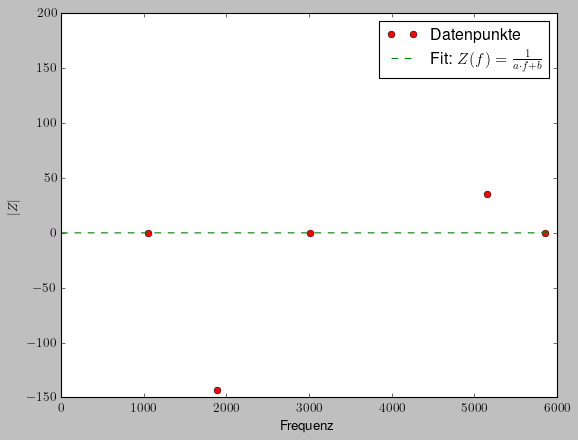

In [27]:
plt.plot(f,Z,'ro',label='Datenpunkte')
#plt.plot(x_plot,y_plot,'b--',label='Fitkurve')
plt.plot(x_plot,y_plot_2,'--',color='green',label=r'Fit: $Z(f) = \frac{1}{a\cdot f +b}$')
plt.xlabel(r'Frequenz')
plt.ylabel(r'$|Z|$')
plt.legend()
plt.show()

# Aufgabe 4

# Aufgabe 5

# Aufgabe 6

# Aufgabe 7

# Aufgabe 8

# Aufgabe 9

# Aufgabe 10

# Aufgabe 11

# Aufgabe 12

# Aufgabe 13